# 데이터 분석 및 시각화
## 장르, 글자 수, 업로드 간격 컬럼 분석

matplotlib 한글 깨짐 현상 해결

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

위 셀 실행 후 런타임 다시 시작!

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

### 데이터 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_c = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/challenge_novel_final.csv', index_col='이름')
df_b = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/best_novel_final.csv', index_col='이름')
df_c.head(5)

,장르,총합 별점,관심수,총합 별점.1,1화 별점수,1화 별점,1화 조회수,2화 별점수,2화 별점,2화 조회수,...,4화 공백 제거 글자수,5화 단어 수,5화 공백 수,5화 공백 포함 글자수,5화 공백 제거 글자수,1화 댓글 수,2화 댓글 수,3화 댓글 수,4화 댓글 수,5화 댓글 수
이름,,,,,,,,,,,,,,,,,,,,,
"나의 친구, 다정한 완벽주의자",로맨스,10.00,344,10.00,35,10.0,4837,32,10.0,3308,...,4537,1212,1211,5014,3803,5,3,5,3,3
눈빛만으로,로맨스,9.99,106,9.99,14,10.0,356,12,10.0,378,...,3885,949,948,5162,4214,4,1,1,0,0
내 공식적인 아내가 되어줘,로맨스,10.00,118,10.00,11,10.0,1302,6,10.0,1045,...,3781,1104,1103,4924,3821,0,0,0,0,0
나의 여름은 낭만이었다,로맨스,10.00,144,10.00,8,10.0,374,13,10.0,392,...,4226,1507,1506,6636,5130,0,2,0,0,0
"5분, 둘 만의 비밀",로맨스,10.00,149,10.00,14,10.0,1398,19,10.0,1218,...,5783,1461,1460,6415,4955,2,0,0,1,0


In [ ]:
df_b.head(5)

,장르,총합 별점,관심수,총합 별점.1,1화 별점수,1화 별점,1화 조회수,2화 별점수,2화 별점,2화 조회수,...,4화 공백 제거 글자수,5화 단어 수,5화 공백 수,5화 공백 포함 글자수,5화 공백 제거 글자수,1화 댓글 수,2화 댓글 수,3화 댓글 수,4화 댓글 수,5화 댓글 수
이름,,,,,,,,,,,,,,,,,,,,,
임신 계략,로맨스,9.98,2179,9.98,166,9.95,30000,156,10.00,30000,...,3668,1096,1095,4711,3616,2,7.0,4,1,5
제국의 하인,로맨스,9.99,2135,9.99,225,10.00,30000,181,9.95,20000,...,4154,1497,1496,6120,4624,21,9.0,12,5,3
"첫사랑, 첫이별, 첫아이",로맨스,9.99,1549,9.99,211,9.86,20000,172,9.93,20000,...,4037,1225,1224,5262,4038,16,10.0,10,16,4
못난이 아내,로맨스,9.98,1136,9.98,99,9.92,10000,100,9.94,10000,...,5267,961,960,4466,3506,1,1.0,1,0,1
남편의 체온,로맨스,9.97,1482,9.97,177,9.97,30000,155,10.00,20000,...,5324,1587,1586,6617,5031,13,12.0,4,5,14


In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 나의 친구, 다정한 완벽주의자 to 당신도 용사가 될 수 있습니다! 아마도?
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   장르            139 non-null    object 
 1   총합 별점         139 non-null    float64
 2   관심수           139 non-null    int64  
 3   총합 별점.1       139 non-null    float64
 4   1화 별점수        139 non-null    int64  
 5   1화 별점         139 non-null    float64
 6   1화 조회수        139 non-null    int64  
 7   2화 별점수        139 non-null    int64  
 8   2화 별점         139 non-null    float64
 9   2화 조회수        139 non-null    int64  
 10  3화 별점수        139 non-null    int64  
 11  3화 별점         139 non-null    float64
 12  3화 조회수        139 non-null    int64  
 13  4화 별점수        139 non-null    int64  
 14  4화 별점         139 non-null    float64
 15  4화 조회수        139 non-null    int64  
 16  5화 별점수        139 non-null    int64  
 17  5화 별점         139 non-null    float64
 18  5

<function matplotlib.pyplot.show(close=None, block=None)>

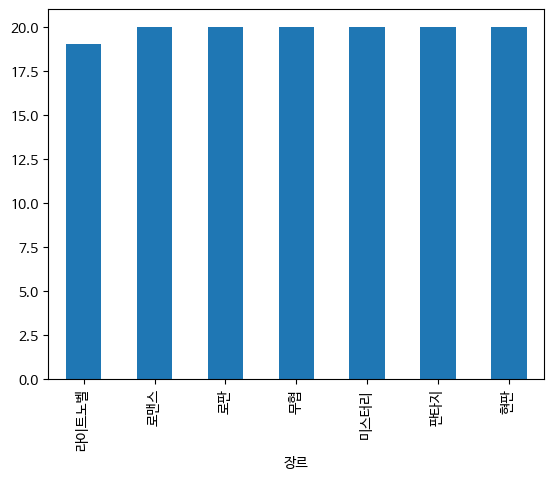

In [ ]:
genre_counts = df_c.groupby('장르').size()
genre_counts.plot(kind='bar')
plt.show

### 평균 업로드 간격 분석

In [ ]:
# 1~5화 업로드 간격 -> 평균 업로드 간격 계산

df_c['평균 업로드 간격'] = df_c[['1-2화 업로드 간격', '2-3화 업로드 간격', '3-4화 업로드 간격', '4-5화 업로드 간격']].mean(axis=1)
df_b['평균 업로드 간격'] = df_b[['1-2화 업로드 간격', '2-3화 업로드 간격', '3-4화 업로드 간격', '4-5화 업로드 간격']].mean(axis=1)
df_c.head(3)

,장르,총합 별점,관심수,총합 별점.1,1화 별점수,1화 별점,1화 조회수,2화 별점수,2화 별점,2화 조회수,...,5화 단어 수,5화 공백 수,5화 공백 포함 글자수,5화 공백 제거 글자수,1화 댓글 수,2화 댓글 수,3화 댓글 수,4화 댓글 수,5화 댓글 수,평균 업로드 간격
이름,,,,,,,,,,,,,,,,,,,,,
"나의 친구, 다정한 완벽주의자",로맨스,10.00,344,10.00,35,10.0,4837,32,10.0,3308,...,1212,1211,5014,3803,5,3,5,3,3,4.25
눈빛만으로,로맨스,9.99,106,9.99,14,10.0,356,12,10.0,378,...,949,948,5162,4214,4,1,1,0,0,1.00
내 공식적인 아내가 되어줘,로맨스,10.00,118,10.00,11,10.0,1302,6,10.0,1045,...,1104,1103,4924,3821,0,0,0,0,0,1.00


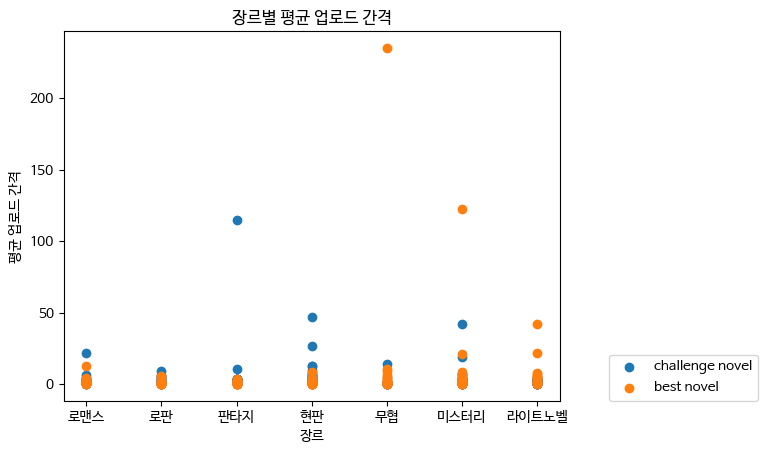

In [ ]:
## 장르별 평균 업로드 간격 - scatter plot

plt.scatter(df_c['장르'], df_c['평균 업로드 간격'], label='challenge novel')
plt.scatter(df_b['장르'], df_b['평균 업로드 간격'], label='best novel')
plt.legend(loc=(1.1, 0))
plt.xlabel('장르')
plt.ylabel('평균 업로드 간격')
plt.title('장르별 평균 업로드 간격')
plt.show()
# outlier 제거 필요

- 장르별 평균 업로드 간격이 100일 이상인 데이터는 outlier로 판단 후 삭제

In [ ]:
# 장르별 평균 업로드 간격 outlier 제거

# challenge novel
out = df_c[df_c['평균 업로드 간격'] >= 100].index
print(out)
df_c.drop(out, inplace=True)

Index(['엘더원 실험과 사냥(I.D.O)'], dtype='object', name='이름')


In [ ]:
# best novel
out = df_b[df_b['평균 업로드 간격'] >= 100].index
print(out)
df_b.drop(out, inplace=True)

Index(['흑가(黑家)', '범죄를 하는 경찰 조직.'나의 투쟁''], dtype='object', name='이름')


### 평균 공백 수 분석

In [ ]:
# 1~5화 공백 수 -> 평균 공백 수 계산

df_c['평균 공백 수'] = df_c[['1화 공백 수', '2화 공백 수', '3화 공백 수', '4화 공백 수', '5화 공백 수']].mean(axis=1)
df_b['평균 공백 수'] = df_b[['1화 공백 수', '2화 공백 수', '3화 공백 수', '4화 공백 수', '5화 공백 수']].mean(axis=1)
df_c.head(3)

,장르,총합 별점,관심수,총합 별점.1,1화 별점수,1화 별점,1화 조회수,2화 별점수,2화 별점,2화 조회수,...,5화 공백 수,5화 공백 포함 글자수,5화 공백 제거 글자수,1화 댓글 수,2화 댓글 수,3화 댓글 수,4화 댓글 수,5화 댓글 수,평균 업로드 간격,평균 공백 수
이름,,,,,,,,,,,,,,,,,,,,,
"나의 친구, 다정한 완벽주의자",로맨스,10.00,344,10.00,35,10.0,4837,32,10.0,3308,...,1211,5014,3803,5,3,5,3,3,4.25,1325.6
눈빛만으로,로맨스,9.99,106,9.99,14,10.0,356,12,10.0,378,...,948,5162,4214,4,1,1,0,0,1.00,869.4
내 공식적인 아내가 되어줘,로맨스,10.00,118,10.00,11,10.0,1302,6,10.0,1045,...,1103,4924,3821,0,0,0,0,0,1.00,1104.2


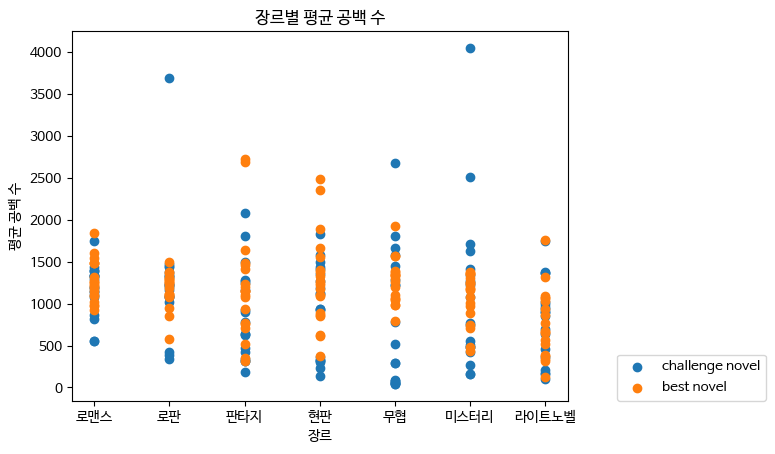

In [ ]:
## 장르별 평균 공백 수 분포

plt.scatter(df_c['장르'], df_c['평균 공백 수'], label='challenge novel')
plt.scatter(df_b['장르'], df_b['평균 공백 수'], label='best novel')
plt.xlabel('장르')
plt.ylabel('평균 공백 수')
plt.title('장르별 평균 공백 수')
plt.legend(loc=(1.1, 0))
plt.show()

### 평균 공백 제거 글자수 분석

In [ ]:
# 1~5화 공백 제거 글자 수 -> 평균 공백 제거 글자 수 계산

df_c['평균 공백 제거 글자수'] = df_c[['1화 공백 제거 글자수', '2화 공백 제거 글자수', '3화 공백 제거 글자수', '4화 공백 제거 글자수', '5화 공백 제거 글자수']].mean(axis=1)
df_b['평균 공백 제거 글자수'] = df_b[['1화 공백 제거 글자수', '2화 공백 제거 글자수', '3화 공백 제거 글자수', '4화 공백 제거 글자수', '5화 공백 제거 글자수']].mean(axis=1)
df_c.head(3)

,장르,총합 별점,관심수,총합 별점.1,1화 별점수,1화 별점,1화 조회수,2화 별점수,2화 별점,2화 조회수,...,5화 공백 포함 글자수,5화 공백 제거 글자수,1화 댓글 수,2화 댓글 수,3화 댓글 수,4화 댓글 수,5화 댓글 수,평균 업로드 간격,평균 공백 수,평균 공백 제거 글자수
이름,,,,,,,,,,,,,,,,,,,,,
"나의 친구, 다정한 완벽주의자",로맨스,10.00,344,10.00,35,10.0,4837,32,10.0,3308,...,5014,3803,5,3,5,3,3,4.25,1325.6,4158.0
눈빛만으로,로맨스,9.99,106,9.99,14,10.0,356,12,10.0,378,...,5162,4214,4,1,1,0,0,1.00,869.4,3917.0
내 공식적인 아내가 되어줘,로맨스,10.00,118,10.00,11,10.0,1302,6,10.0,1045,...,4924,3821,0,0,0,0,0,1.00,1104.2,3739.0


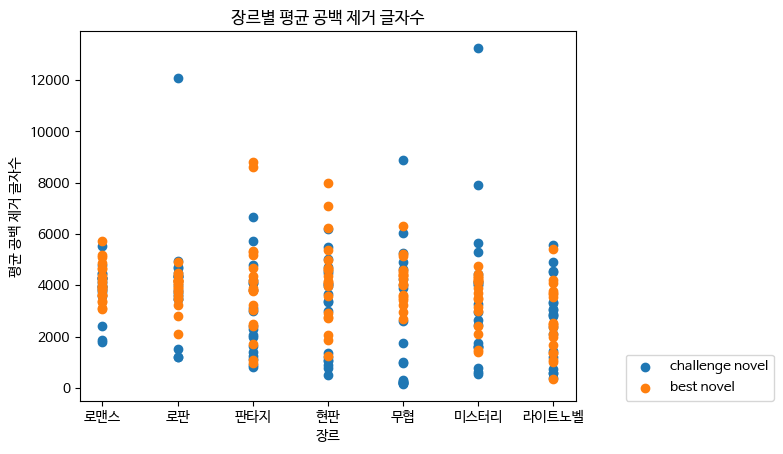

In [ ]:
## 장르별 평균 공백 제거 글자수 분포

plt.scatter(df_c['장르'], df_c['평균 공백 제거 글자수'], label='challenge novel')
plt.scatter(df_b['장르'], df_b['평균 공백 제거 글자수'], label='best novel')
plt.xlabel('장르')
plt.ylabel('평균 공백 제거 글자수')
plt.title('장르별 평균 공백 제거 글자수')
plt.legend(loc=(1.1, 0))
plt.show()

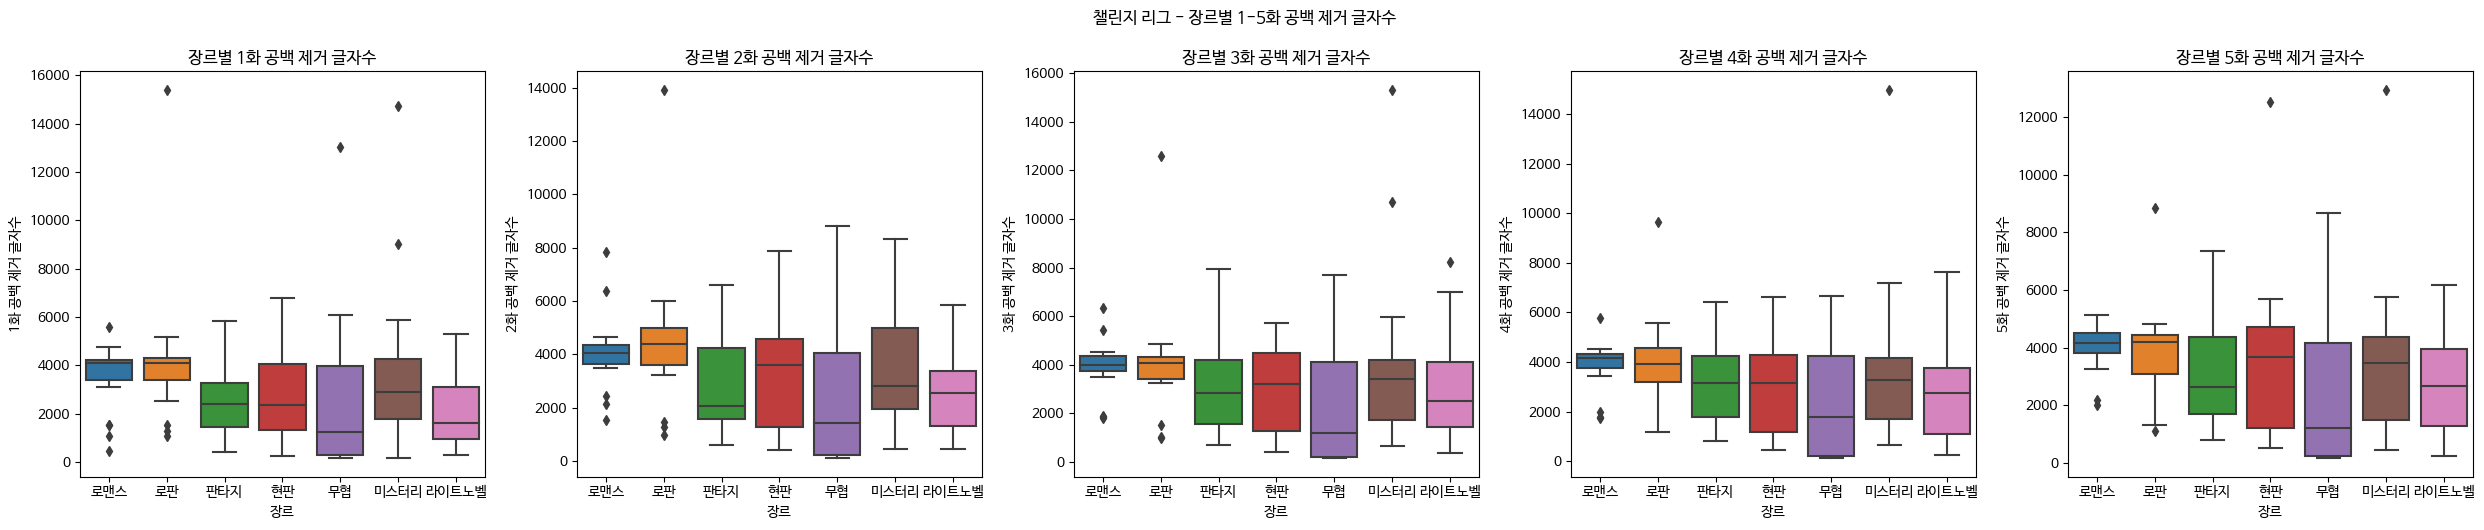

In [ ]:
## 챌린지 리그 - 장르별 1~5화 공백 제거 글자수

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))

# 선택된 컬럼에 대한 boxplot 그리기
for i in range(1, 6):
  col = str(i) + '화 공백 제거 글자수'
  sns.boxplot(y=col, x='장르', data=df_c, ax=axes[i-1])
  axes[i-1].set_title('장르별 ' + col)

# 그래프 출력
plt.tight_layout()
plt.suptitle('챌린지 리그 - 장르별 1-5화 공백 제거 글자수', y=1.05)
plt.show()

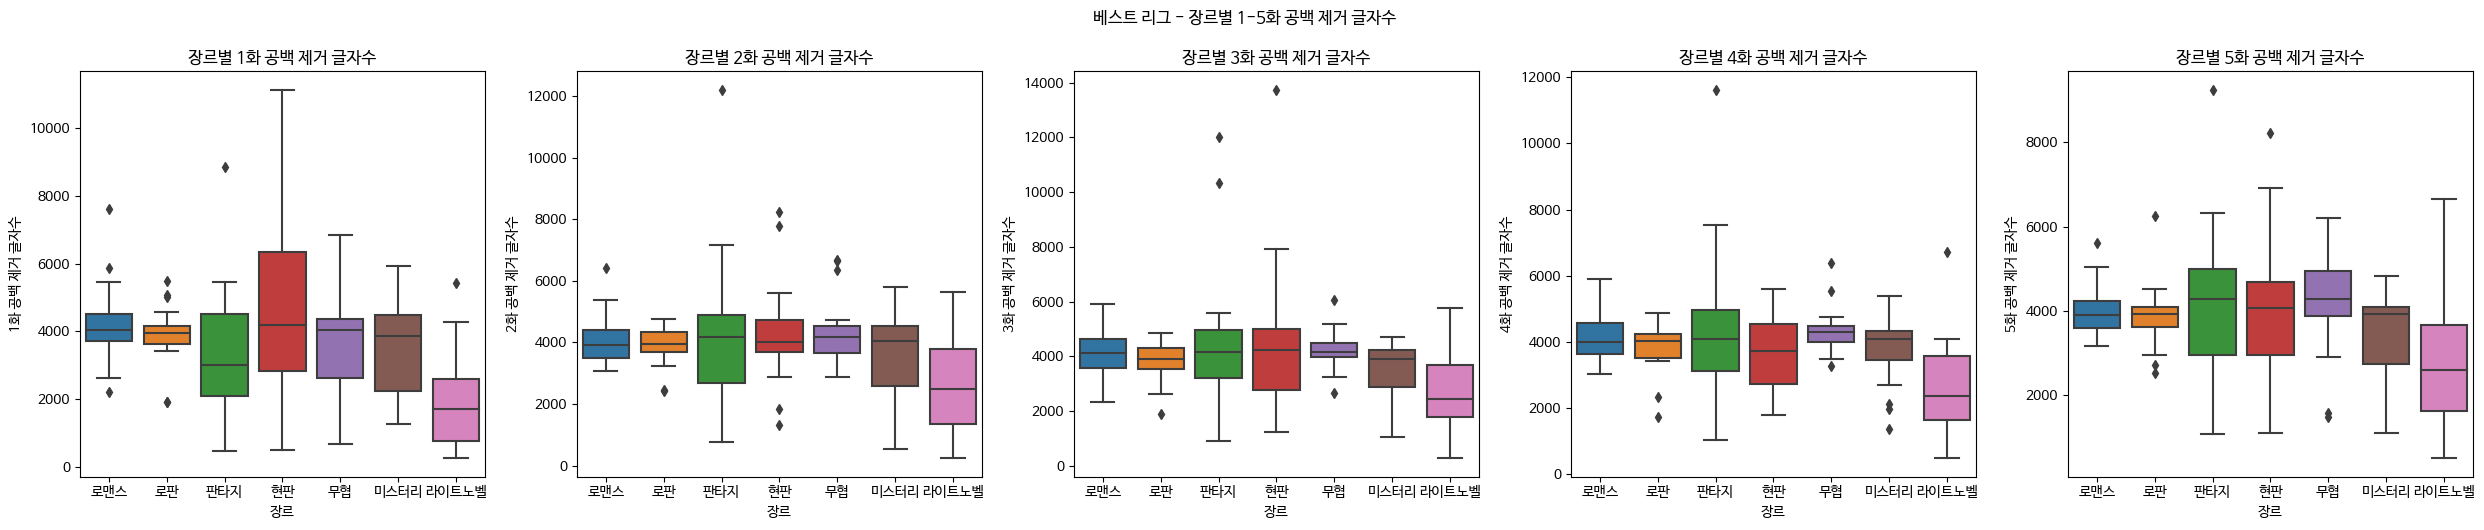

In [ ]:
## 베스트 리그 - 장르별 1~5화 공백 제거 글자수

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))

# 선택된 컬럼에 대한 boxplot 그리기
for i in range(1, 6):
  col = str(i) + '화 공백 제거 글자수'
  sns.boxplot(y=col, x='장르', data=df_b, ax=axes[i-1])
  axes[i-1].set_title('장르별 ' + col)

# 그래프 출력
plt.tight_layout()
plt.suptitle('베스트 리그 - 장르별 1-5화 공백 제거 글자수', y=1.05)
plt.show()

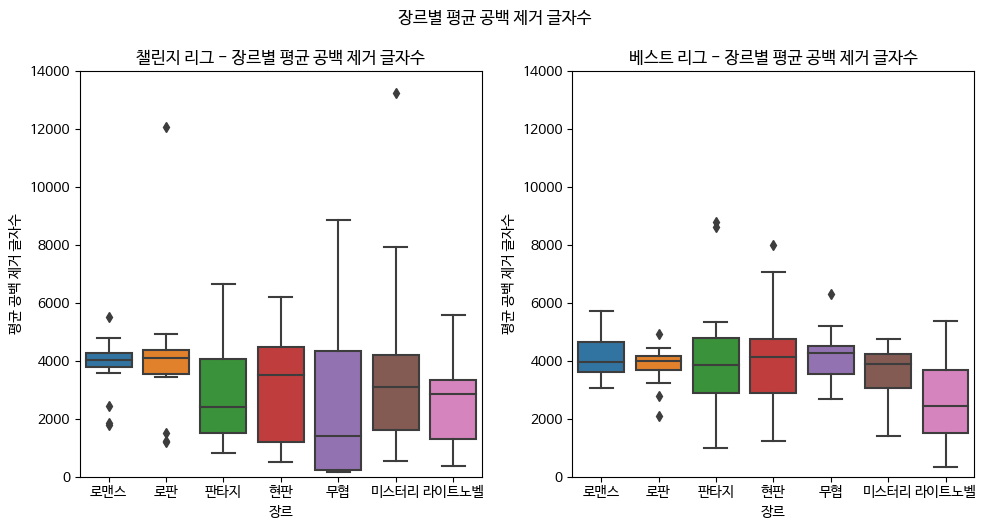

In [ ]:
## 장르별 평균 공백 제거 글자수 비교

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# 선택된 컬럼에 대한 boxplot 그리기
sns.boxplot(y='평균 공백 제거 글자수', x='장르', data=df_c, ax=axes[0]).set(ylim=(0, 14000))
axes[0].set_title('챌린지 리그 - 장르별 평균 공백 제거 글자수')

sns.boxplot(y='평균 공백 제거 글자수', x='장르', data=df_b, ax=axes[1]).set(ylim=(0, 14000))
axes[1].set_title('베스트 리그 - 장르별 평균 공백 제거 글자수')

# 그래프 출력
plt.tight_layout()
plt.suptitle('장르별 평균 공백 제거 글자수', y=1.05)
plt.show()